Instructions: Make a copy of this notebook and rename into the format `ID.ipynb` (example: `12345678.ipynb`). Read all the comments and write appropriate code after any place that says `# YOUR CODE HERE`. When the daily evaluation tasks are revealed, append their solutions at the end of this notebook.

---

Part 1: Polynomial Root Finding Using Bisection Method
---

### `pandas` Dataframe:
Before we start we will know a little about `pandas` dataframe. `pandas` is a python library. Dataframes are classes that are used to store complex data. You can initialize one as a python dictionary. Let's take a look.

In [3]:
import pandas as pd

x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [1.0, 5.2, 3.9, 8.4, 14.6, 12.3, 8.9, 10.2]

dictionary = {
    "x": x,
    "y": y,
}
df = pd.DataFrame(dictionary)
df.head(8)

,x,y
0,0,1.0
1,1,5.2
2,2,3.9
3,3,8.4
4,4,14.6
5,5,12.3
6,6,8.9
7,7,10.2


We can use it to print data in a tabular format. We can even use more numpy arrays with it.

In [4]:
import numpy as np

x = np.linspace(0, np.pi/2, 15)
y = np.sin(x)

dictionary = {
    "x": x,
    "sin(x)": y,
}
df = pd.DataFrame(dictionary)
df.head(5)

,x,sin(x)
0,0.000000,0.000000
1,0.112200,0.111964
2,0.224399,0.222521
3,0.336599,0.330279
4,0.448799,0.433884


### Root Finding:
Let $f(x)$ be a function of $x$. if for some $x=\alpha, f(x) = f(\alpha) = 0$, we say $\alpha$ is a root of function $x$.

Let,
$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + 0.5x + 2\tag{6.1}$$

The graph of $f(x)$ looks like this.

[-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


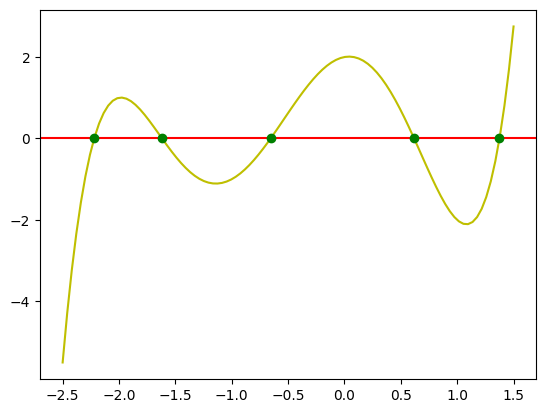

In [5]:
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
x = np.linspace(-2.5, 1.5, 100)
y = f(x)

plt.axhline(y=0, color='r')
plt.plot(x, y,'y')
plt.plot(f.roots(), [0.0]*5, 'go')
print(f.roots())

Roots are the points where the graph intersects with the $X$-axis.

### Bisection

One way to find out root's are to use bisection method. Here is the strategy, if $\alpha$ is a root between and interval $[a, b]$ then graph will cross the $X$-axis at $\alpha$. So, $sign( f(\alpha-h) ) = - sign( f(\alpha+h) )$, for small value of $h$.

So, we can work our way up towards the root by taking average of $a$ and $b$, as long as the signs are different.

we will start with $a_0$ and $b_0$, such that, $f(a_0) f(b_0) < 0$.
Then we iterate as this,
\begin{align}
m_k &= \frac{a_k + b_k}{2} \\
\text{if, } f(a_k) f(m_k) < 0, \text{ then, } a_{k+1} &= a_k \text{ and } b_{k+1} = m_k\\
\text{else, } a_{k+1} &= m_k \text{ and, } b_{k+1} = b_k
\end{align}

We keep iterating until we find the root with sufficient precision. We usually use a formula like this,
$$
\frac{|m_{k+1} - m_k|}{|m_{k+1}|} \leq \epsilon \\  
$$
Where, $\epsilon$ is a very small value, like $\epsilon < 10^{-6}$

## Task 1 - 2 Marks
Complete the code below to iterate and solve for a root of the following equation, between the interval, $[-0.5, 1.3]$:
\begin{aligned}
    f(x) = 2 + 0.5x - 6x^2 - 2x^3 + 2.5x^4 + x^5.
\end{aligned}

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# The polynomial and the range is defined for you
f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
a = -0.5
b = 1.3
m = (a + b) / 2
e = 1e-6

root = 0.0    # You need to update this value

# Populate the following lists in each iteration
list_a = []
list_b = []
list_m = []
list_f = []

# YOUR CODE HERE
test = True

while test:
  list_a.append(a)
  list_b.append(b)
  list_m.append(m)
  list_f.append(f)

  if  (f(b) * f(m)) < 0:
    a = m
    m = (a + b) / 2
  elif  (f(a) * f(m)) < 0:
    b = m
    m = (a + b) / 2
  else:
    root = m
    test = False

  if  (abs(m - list_m[-1]) / abs(m)) <= e:
    root = m
    break

In [7]:
xs = np.linspace(-2.5, 1.5, 100)
ys = f(xs)

           a         b         m                              f(m)
0  -0.500000  1.300000  0.400000  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
1   0.400000  1.300000  0.850000  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
2   0.400000  0.850000  0.625000  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
3   0.400000  0.625000  0.512500  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
4   0.512500  0.625000  0.568750  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
5   0.568750  0.625000  0.596875  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
6   0.596875  0.625000  0.610938  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
7   0.610938  0.625000  0.617969  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
8   0.617969  0.625000  0.621484  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
9   0.617969  0.621484  0.619727  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
10  0.617969  0.619727  0.618848  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
11  0.617969  0.618848  0.618408  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
12  0.617969  0.618408  0.618188  (2.0, 0.5, -6.0, -2.0, 2.5, 1.0)
13  0.617969  0.618188  0.618079  (2.0, 0.5, -6.0, -2.0, 2.5, 

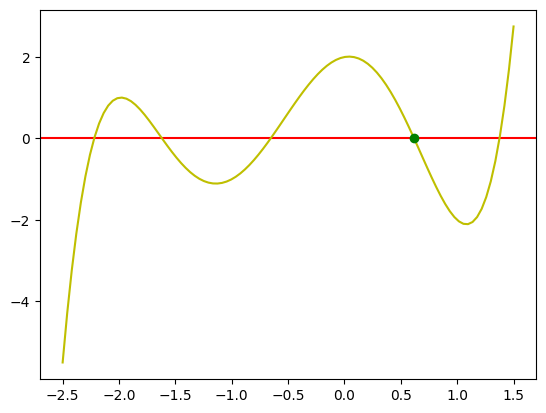

In [8]:
plt.axhline(y=0, color='r')
plt.plot(xs, ys,'y')
plt.plot(root, f(root), 'go')

print(pd.DataFrame({'a':list_a, 'b':list_b, 'm':list_m, 'f(m)':list_f}))

assert "{:.3f}".format(root) == "0.618"

# Part 2: Fixed Point Iteration

### Fixed point:
A number $\xi$ is called a **fixed point** to function $g(x)$ if $g(\xi) = \xi$. Using fixed points are a nice strategy to find roots of an equation. In this method if we are trying to find a root of $f(x) = 0$, we try to write the function in the form, $x = g(x)$. That is,
$$
f(x) = x - g(x) = 0
$$

So, if $\xi$ is a fixed point of $g(x)$ it would also be a root of $f(x)=0$, because,
$$
f(\xi) = \xi - g(\xi) = \xi - \xi = 0
$$

We can find a suitable $g(x)$ in any number of ways. Not all of them would converge; whereas, some would converge very fast. For example, consider $Eq. 6.1$.

\begin{align}
&         &    f(x) &=x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 \\
&\implies &x - g(x) &=x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 \\
&\implies &    g(x) &=-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2 \tag{6.2}\\
\end{align}

again,
$$
f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 = 0\\
$$
\begin{align}
&\implies &6x^2 &= x^5 + 2.5x^4 - 2x^3 + x + 2 \\
&\implies &x^2  &= \frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)\\
&\implies &x    &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)}\\
&\implies &g(x) &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)}\tag{6.3}\\
\end{align}

Similarly,
\begin{align}
&         &2.5x^4 &= -x^5 + 2x^3 + 6x^2 - x - 2 \\
&\implies &x^4  &= \frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)\\
&\implies &x    &= \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)}\\
&\implies &g(x) &= \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)}\tag{6.4}\\
\end{align}

## Task 2 -  2 Marks
For this example we will use a couple of $g(x)$ function to find out which one converges faster.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
g1 = Polynomial([-2.0, 0.0, 6.0, 2.0, -2.5, -1.0])

def g2(x):
    p = Polynomial([2.0, 1.0, 0.0, -2.0, 2.5, 1.0])
    return np.sqrt(p(x)/6)

def g3(x):
    p = Polynomial([-2.0, -1.0, 6.0, 2.0, 0.0, -1.0])
    return np.power(p(x)/2.5, 1.0/4.0)

a1 = 0.80
g1_a = [a1]

a2 = 0.80
g2_a = [a2]

a3 = 0.80
g3_a = [a3]

# YOUR CODE HERE
g1_a.append(a1)
g2_a.append(a2)
g3_a.append(a3)

for i in  range(100):
  x,y,z =g1_a[i], g2_a[i], g3_a[i]

  g1_a.append(g1(x))
  g2_a.append(g2(y))
  g3_a.append(g3(z))

C:\Users\medha\AppData\Local\Temp\ipykernel_7392\3937844111.py:15: RuntimeWarning: invalid value encountered in power
  return np.power(p(x)/2.5, 1.0/4.0)


        g1(x)     g2(x)    g3(x))
0    0.800000  0.800000  0.800000
1    0.800000  0.800000  0.800000
2    1.512320  0.721997  0.912898
3    1.512320  0.721997  0.912898
4   -2.347605  0.688573  1.044444
..        ...       ...       ...
97  -2.000000  0.672424  1.330336
98  -2.000000  0.672424  1.330336
99  -2.000000  0.672424  1.330336
100 -2.000000  0.672424  1.330336
101 -2.000000  0.672424  1.330336

[102 rows x 3 columns]


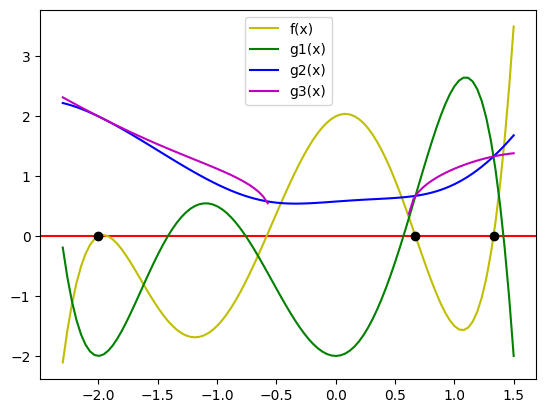

In [10]:
xs = np.linspace(-2.3, 1.5, 100)
ys = f(xs)
dictionary = {
    'x': xs,
    'y': ys
}
plt.axhline(y=0, color='r')
plt.plot(xs, f(xs), label='f(x)', color='y')
plt.plot(xs, g1(xs), label='g1(x)', color='g')
plt.plot(xs, g2(xs), label='g2(x)', color ='b')
plt.plot(xs, g3(xs), label='g3(x)', color = 'm' )
plt.legend()

if len(g1_a) > 0:
    root = np.array([g1_a[len(g1_a)-1], g2_a[len(g2_a)-1], g3_a[len(g3_a)-1]])
    plt.plot(root, f(root), 'ko')

print(pd.DataFrame({'g1(x)':g1_a, 'g2(x)':g2_a, 'g3(x))':g3_a,}))

# Test case:
np.testing.assert_array_almost_equal(root, [-2, 0.67242436, 1.33033625])

# Daily Evaluation - 4 Marks

In [11]:
f = Polynomial([600,-106,1])
a = 0
b = 99
m = (a + b) / 2
e = 1e-6

b_root = 0.0    # You need to update this value

# Populate the following lists in each iteration
list_a = []
list_b = []
list_m = []
list_f = []

# YOUR CODE HERE
test = True

while test:
  list_a.append(a)
  list_b.append(b)
  list_m.append(m)
  list_f.append(f)

  if  (f(b) * f(m)) < 0:
    a = m
    m = (a + b) / 2
  elif  (f(a) * f(m)) < 0:
    b = m
    m = (a + b) / 2
  else:
    b_root = m
    test = False

  if  (abs(m - list_m[-1]) / abs(m)) <= e:
    b_root = m
    break

print(b_root)



6.000000178813934


In [12]:
f = Polynomial([600,-106,1])
g1 = Polynomial([-600,107,-1])

def g2(x):
    p = Polynomial([600,0,1])
    return (p(x)/106)

a1 = 0.80
g1_a = [a1]

a2 = 0.80
g2_a = [a2]

g1_a.append(a1)
g2_a.append(a2)

for i in range(100):
  x,y =g1_a[i], g2_a[i]
  g1_a.append(g1(x))
  g2_a.append(g2(y))

c:\Users\medha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:754: RuntimeWarning: overflow encountered in scalar multiply
  c0 = c[-i] + c0*x
c:\Users\medha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:752: RuntimeWarning: invalid value encountered in scalar multiply
  c0 = c[-1] + x*0


[nan  6.]


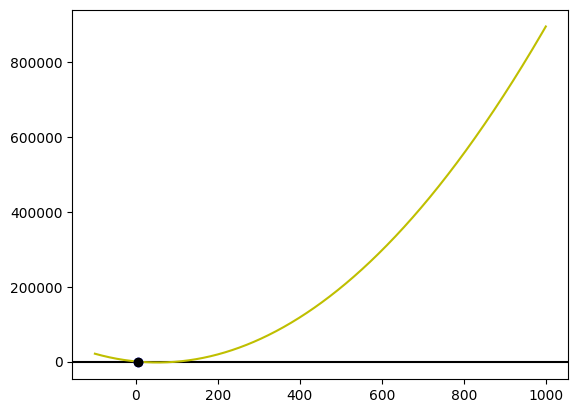

In [13]:
xs = np.linspace(-100, 1000, 1000)
ys = f(xs)
plt.axhline(y=0, color='black')
plt.plot(xs, ys,'y')
plt.plot(b_root, f(b_root), 'bo')
if len(g1_a) > 0:
    root = np.array([g1_a[len(g1_a)-1], g2_a[len(g2_a)-1]])
    plt.plot(root[1], f(root)[1], 'ko')
    print(root)

plt.show()